<a href="https://colab.research.google.com/github/Vinitladse/NETFLIX-MOVIES-AND-TV-SHOWS-CLUSTERING/blob/main/Vinit_Ladse(Group)NETFLIX_MOVIES_AND_TV_SHOWS_CLUSTERING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

# **In this project, you are required to do**
1. Exploratory Data Analysis

2. Understanding what type content is available in different countries

3. Is Netflix has increasingly focusing on TV rather than movies in recent years.

4. Clustering similar content by matching text-based features


# **Attribute Information**

1. show_id : Unique ID for every Movie / Tv Show

2. type : Identifier - A Movie or TV Show

3. title : Title of the Movie / Tv Show

4. director : Director of the Movie

5. cast : Actors involved in the movie / show

6. country : Country where the movie / show was produced

7. date_added : Date it was added on Netflix

8. release_year : Actual Releaseyear of the movie / show

9. rating : TV Rating of the movie / show

10. duration : Total Duration - in minutes or number of seasons

11. listed_in : Genere

12. description: The Summary description

----

In [2]:
# Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import MinMaxScaler
from numpy import math
import warnings
warnings.filterwarnings('ignore')

from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.manifold import TSNE
!pip install nltk
import nltk 
!python3 -c "import nltk; nltk.download('all')"
# for named entity recognition (NER)
from nltk import ne_chunk

# vectorizers for creating the document-term-matrix (DTM)
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.decomposition import TruncatedSVD

import pylab as pl
from nltk.corpus import stopwords  #stopwords
from nltk import word_tokenize,sent_tokenize # tokenizing
from nltk.stem import PorterStemmer,LancasterStemmer  # using the Porter Stemmer and Lancaster Stemmer and others
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer  # lammatizer from WordNet

#stop-words

nltk.download('stopwords')
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package basque_grammars is already up-to-date!
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Pac

In [3]:
# Mounting drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Reading a data file
netflix_data = pd.read_csv('/content/drive/MyDrive/dataset/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')


In [5]:
# It gives top 5 rows of dataset
netflix_data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [6]:
# It gives last 5 rows of dataset
netflix_data.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...
7786,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,NaN,"United Kingdom, Canada, United States","March 1, 2020",2019,TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...


In [7]:
# It gives Total number of rows and columns of dataset
netflix_data.shape

(7787, 12)

Dataset contain 7787 rows and 12 columns

In [8]:
#It gives some basic statistical details like percentile, mean, std, max etc.
netflix_data.describe()

,release_year
count,7787.000000
mean,2013.932580
std,8.757395
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2018.000000
max,2021.000000


In [9]:
# Find the various statistic for all the columns
netflix_data.describe(include ='all')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,7787,7787,7787,5398,7069,7280,7777,7787.000000,7780,7787,7787,7787
unique,7787,2,7787,4049,6831,681,1565,NaN,14,216,492,7769
top,s1,Movie,3%,"Raúl Campos, Jan Suter",David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,Documentaries,Multiple women report their husbands as missin...
freq,1,5377,1,18,18,2555,118,NaN,2863,1608,334,3
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.932580,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.757395,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018.000000,NaN,NaN,NaN,NaN


In [10]:
#It gives total columns, data types and null count of dataset
netflix_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [11]:
# Null Values
# Summing the values to get the null values
netflix_data.isnull().sum()/netflix_data.shape[0]*100

show_id          0.000000
type             0.000000
title            0.000000
director        30.679337
cast             9.220496
country          6.510851
date_added       0.128419
release_year     0.000000
rating           0.089893
duration         0.000000
listed_in        0.000000
description      0.000000
dtype: float64

In [12]:
netflix_data['rating'].value_counts()

TV-MA       2863
TV-14       1931
TV-PG        806
R            665
PG-13        386
TV-Y         280
TV-Y7        271
PG           247
TV-G         194
NR            84
G             39
TV-Y7-FV       6
UR             5
NC-17          3
Name: rating, dtype: int64

In [13]:
netflix_data['country'].value_counts()

United States                                                   2555
India                                                            923
United Kingdom                                                   397
Japan                                                            226
South Korea                                                      183
                                                                ... 
Russia, United States, China                                       1
Italy, Switzerland, France, Germany                                1
United States, United Kingdom, Canada                              1
United States, United Kingdom, Japan                               1
Sweden, Czech Republic, United Kingdom, Denmark, Netherlands       1
Name: country, Length: 681, dtype: int64

#### NULL VALUE TREATMENT

1. RATING & COUNTRY - As rating column has 0.08% null values , so replacing nulls with mose frequent TV-MA rating and doing same thing with country column

2. CAST - cast column has too many different values and more than 9% are missing, so there is no need to keep it but we are keeping it to perform EDA

3. DATE - there are few missing values for date column. so, lets drop missing value rows.

4. DIRECTOR - Director column has more then 30% null values so dropping that column

In [14]:
netflix_data['rating'].replace(np.nan, 'TV-MA',inplace  = True)
netflix_data['country'].replace(np.nan, 'United States',inplace  = True)
netflix_data['cast'].replace(np.nan, 'missing info',inplace  = True)

netflix_data= netflix_data.drop(columns= ['director'],axis=1)

In [15]:
netflix_data = netflix_data[netflix_data['date_added'].notna()]

In [16]:
# Checking the null values
netflix_data.isnull().sum()

show_id         0
type            0
title           0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

-- Let's genereate new columns for our analyis

In [17]:
# New Features
# Add new features
netflix_data["date_added"] = pd.to_datetime(netflix_data['date_added'])
netflix_data['year_added'] = netflix_data['date_added'].dt.year
netflix_data['month_added'] = netflix_data['date_added'].dt.month

# **Exploratory Data Analysis**

In [18]:
# Check the Duplicates entries
len (netflix_data[netflix_data.duplicated()])

0

No duplicates found in the data

-- Analyze the type of content available on Netflix

No handles with labels found to put in legend.


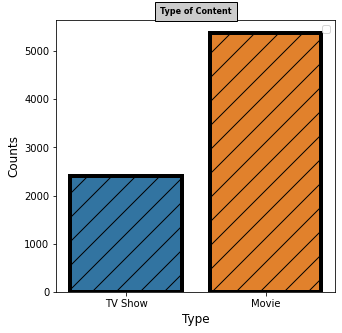

In [19]:
# Plotting the countplot
plt.figure(figsize=(5,5))
ax=sns.countplot('type',data=netflix_data,lw=4, ec='black',
                  hatch='/')
plt.title('Type of Content', fontsize=8,fontweight='bold',
          bbox={'facecolor':'0.8', 'pad':5},)
plt.xlabel('Type',fontsize=12)
plt.ylabel('Counts',fontsize=12)
plt.legend()
plt.show()
# Adding Annotation
for p in ax.patches:
  ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height())
  , ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points',fontsize=14)

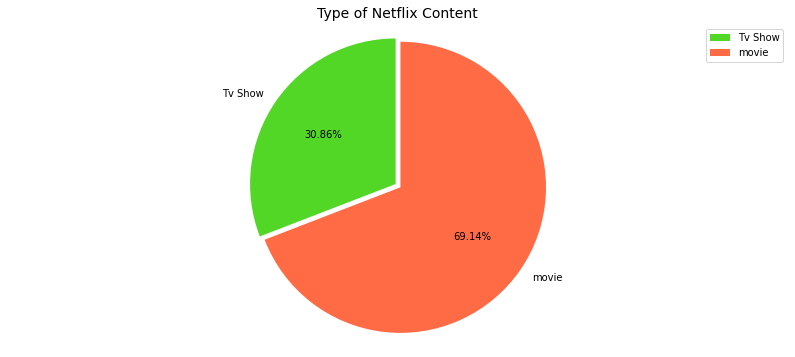

In [20]:
# ploting for pie chart on type feature

plt.figure(figsize =(14,6))
labels = ['Tv Show', 'movie']
plt.pie(netflix_data['type'].value_counts().sort_values(),labels=labels, explode =[0.02,0.02],
        autopct='%1.2f%%', colors=['#52D726', '#FF6B45'],startangle = 90)
plt.title('Type of Netflix Content', fontsize = 14)
plt.axis('equal', fontsize = 12)
plt.legend()
plt.show()

Observations :-

It is evident that there are more movies on Netflix than TV shows.

Netflix has 5377 movies, which is more than double the quantity of TV shows.

There are about 70% movies and 30% TV shows on Netflix


In [21]:
country = netflix_data['country'].value_counts().reset_index()
country = country[country['country'] /  country['country'].sum() > 0.01]


fig = px.pie(country, values='country', names='index',color_discrete_sequence=px.colors.sequential.Reds)
fig.update_traces(textposition='inside', textinfo='percent+label',
                  marker = dict(line = dict(color = 'orange', width = 2)))
fig.show()

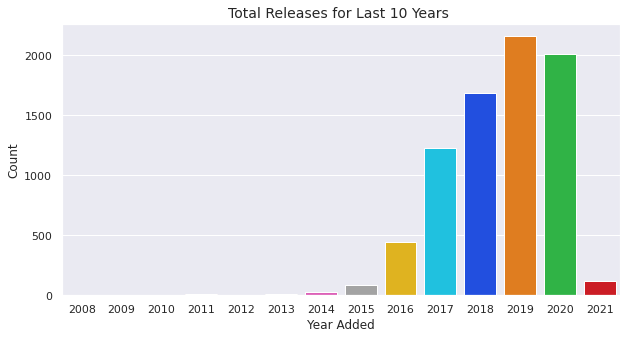

In [22]:
# Total release for last 10 years
sns.set(rc={'figure.figsize':(10,5)})
sns.countplot(x='year_added',data=netflix_data,palette = "bright")

plt.title('Total Releases for Last 10 Years ',fontsize = 14)  
plt.xlabel('Year Added', fontsize = 12) 
plt.ylabel('Count', fontsize = 12)   
plt.show()

The number of release have significantly increased after 2015 and have dropped in 2021 becase of Covid 19

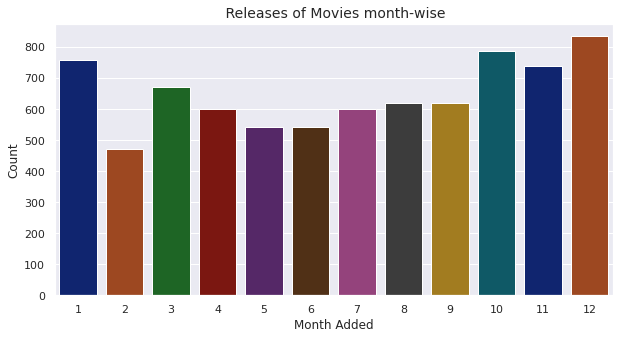

In [23]:
# Release of movies month-wise
sns.set(rc={'figure.figsize':(10,5)})
sns.countplot(x='month_added',data=netflix_data,palette="dark")

plt.title(' Releases of Movies month-wise',fontsize = 14)  
plt.xlabel('Month Added', fontsize = 12) 
plt.ylabel('Count', fontsize = 12)    
plt.show()

More of the content is released in holiday season - October, November, December and January

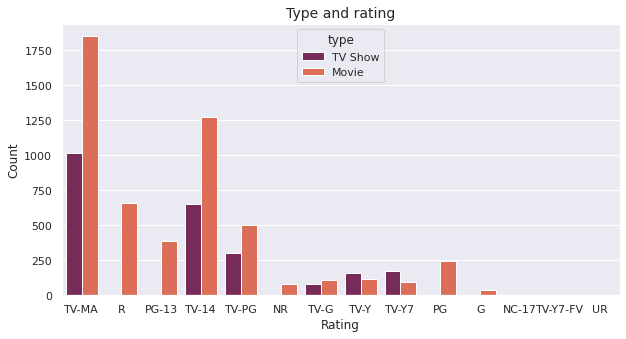

In [24]:
# Rating
plt.figure(figsize=(10,5))
sns.countplot(x='rating',hue='type',data=netflix_data,palette="rocket")
plt.title('Type and rating',fontsize = 14)
plt.xlabel('Rating', fontsize = 12) 
plt.ylabel('Count', fontsize = 12)  
plt.show()

**Obseravtions**

The 'TV-MA' rating is used in the majority of the film. The TV Parental Guidelines provide a "TV-MA" classification to a television programme that is intended solely for mature audiences.

The second largest is 'TV-14,' which stands for content that may be inappropriate for minors under the age of 14.

The third most common is the extremely popular 'R' rating. The Motion Picture Association of America defines an R-rated film as one that contains material that may be inappropriate for children under the age of 17; the MPAA states that "Under 17 requires accompanying parent or adult guardian."

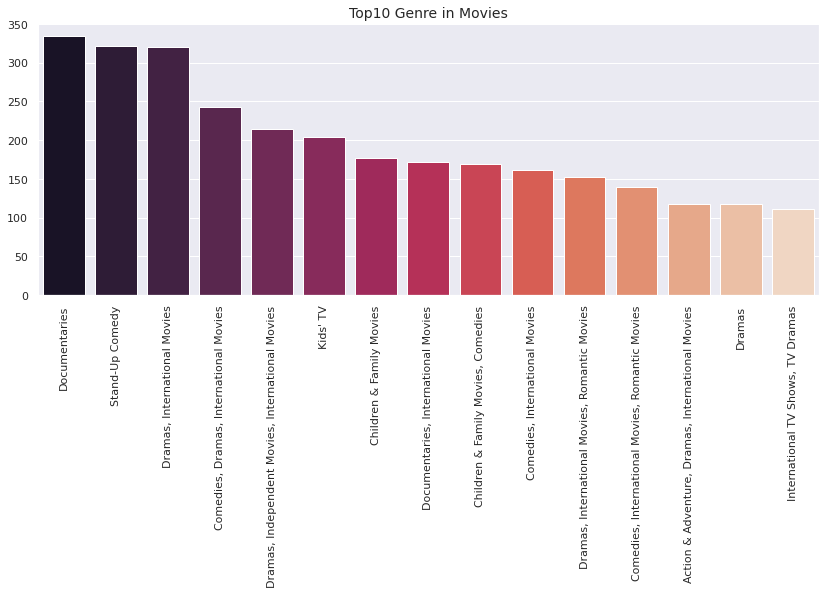

In [25]:
# Top 10 Genre in movies
plt.figure(figsize=(14,5))
sns.barplot(x = netflix_data["listed_in"].value_counts().head(15).index,
            y = netflix_data["listed_in"].value_counts().head(15).values,palette="rocket")
plt.xticks(rotation=90)
plt.title("Top10 Genre in Movies",fontsize = 14)
plt.show()

In [26]:
# top 20 actors netflix
netflix_data['cast_name'] = netflix_data['cast'].apply(lambda x :  x.split(',')) 
cast_count = []
for i in netflix_data['cast_name']: cast_count += i
    
cast_dict = dict((i, cast_count.count(i)) for i in cast_count)

data_cast_count = pd.DataFrame(cast_dict.values(),cast_dict.keys()).reset_index().sort_values(0,ascending=False).rename(
    columns = {'index' : 'cast_name', 0 : 'count'}).iloc[1:21]

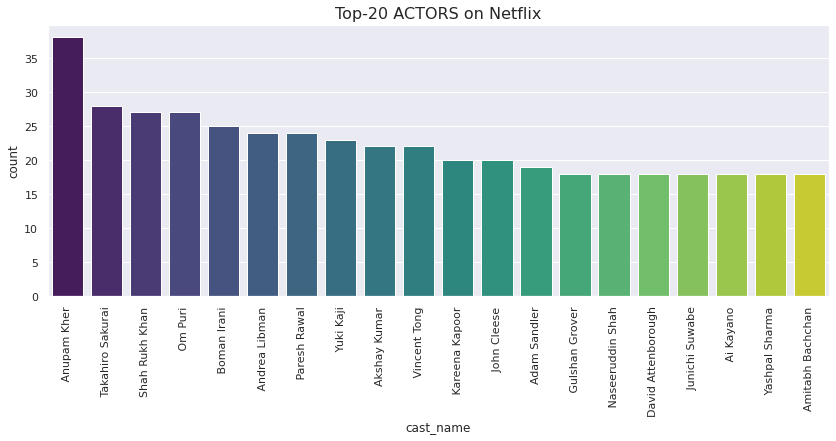

In [27]:

plt.figure(figsize=(14,5))
sns.barplot(x='cast_name',y='count',data=data_cast_count,palette="viridis")
plt.title("Top-20 ACTORS on Netflix",fontsize='16')
plt.xticks(rotation=90)
plt.show()

In [28]:
netflix_data['duration']=netflix_data['duration'].str.replace('Season','')
netflix_data['duration']=netflix_data['duration'].str.replace('s','')
netflix_data['duration']=netflix_data['duration'].str.replace('min','')

netflix_data['duration']=netflix_data['duration'].astype(str).astype(int)
netflix_data['duration']

0         4
1        93
2        78
3        80
4       123
       ... 
7782     99
7783    111
7784     44
7785      1
7786     90
Name: duration, Length: 7777, dtype: int64

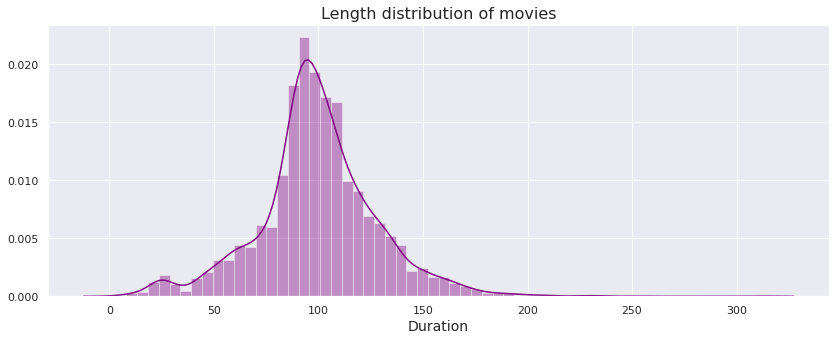

In [29]:
# Length distribution of movies
movie_data = netflix_data[netflix_data['type']=='Movie']

plt.figure(figsize=(14, 5))

sns.distplot(movie_data['duration'], bins=60,color='purple').set(ylabel=None)

plt.title('Length distribution of movies', fontsize=16)
plt.xlabel('Duration', fontsize=14)
plt.show()

In [30]:
# Season-wise distribution of tv shows
tv_data = netflix_data[netflix_data['type']=='TV Show']
tv_data['duration'].value_counts()


tv=tv_data['duration'].value_counts().T.reset_index()


fig = px.pie(tv,values='duration',names='index',color_discrete_sequence=px.colors.sequential.RdBu)
fig.update_layout(title="season-wise distribution of tv shows")
fig.update_traces(textposition='inside', textinfo='percent+label', textfont_size=20,
                  marker=dict( line=dict(color='#7851a9', width=2)))

###**LONGEST TV - SHOWS**

In [31]:
long_shows = tv_data[tv_data['duration']>9]
long_shows_data = long_shows[['title','duration']]
long_shows_data.sort_values(by=['duration'],ascending=False)

,title,duration
2538,Grey's Anatomy,16
4438,NCIS,15
5912,Supernatural,15
1471,COMEDIANS of the world,13
1537,Criminal Minds,12
7169,Trailer Park Boys,12
1300,Cheers,11
2678,Heartland,11
1577,Dad's Army,10
1597,Danger Mouse: Classic Collection,10


###**DATA CLEANING AND PREPROCESSING**

In [32]:
netflix_data.columns

Index(['show_id', 'type', 'title', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'year_added', 'month_added', 'cast_name'],
      dtype='object')

In [33]:
movie_data.drop(columns=['show_id', 'title', 'cast', 'date_added',
          'description', 'cast_name'],axis=1,inplace=True)

tv_data.drop(columns=['show_id', 'title', 'cast', 'date_added',
          'description', 'cast_name'],axis=1,inplace=True)

new_netflix_data = netflix_data.drop(columns=['show_id', 'title', 'cast', 'date_added',
          'description', 'cast_name'],axis=1)
movie_data

,type,country,release_year,rating,duration,listed_in,year_added,month_added
1,Movie,Mexico,2016,TV-MA,93,"Dramas, International Movies",2016,12
2,Movie,Singapore,2011,R,78,"Horror Movies, International Movies",2018,12
3,Movie,United States,2009,PG-13,80,"Action & Adventure, Independent Movies, Sci-Fi...",2017,11
4,Movie,United States,2008,PG-13,123,Dramas,2020,1
6,Movie,Egypt,2019,TV-MA,95,"Horror Movies, International Movies",2020,6
...,...,...,...,...,...,...,...,...
7781,Movie,United States,2006,PG,88,"Children & Family Movies, Comedies",2020,1
7782,Movie,"Sweden, Czech Republic, United Kingdom, Denmar...",2005,TV-MA,99,"Dramas, International Movies",2020,10
7783,Movie,India,2015,TV-14,111,"Dramas, International Movies, Music & Musicals",2019,3
7784,Movie,United States,2019,TV-MA,44,"Documentaries, International Movies, Music & M...",2020,9


In [34]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
new_netflix_data["type"] = le.fit_transform(new_netflix_data["type"])
new_netflix_data["country"] = le.fit_transform(new_netflix_data["country"])

new_netflix_data['rating'] = le.fit_transform(new_netflix_data['rating'])
new_netflix_data['listed_in'] = le.fit_transform(new_netflix_data['listed_in'])

###**Text Cleaning**

In [35]:
# Combining genre and description column 
text_data = netflix_data['listed_in'] + netflix_data['description']
text_data

0       International TV Shows, TV Dramas, TV Sci-Fi &...
1       Dramas, International MoviesAfter a devastatin...
2       Horror Movies, International MoviesWhen an arm...
3       Action & Adventure, Independent Movies, Sci-Fi...
4       DramasA brilliant group of students become car...
                              ...                        
7782    Dramas, International MoviesWhen Lebanon's Civ...
7783    Dramas, International Movies, Music & Musicals...
7784    Documentaries, International Movies, Music & M...
7785    International TV Shows, Reality TVDessert wiza...
7786    Documentaries, Music & MusicalsThis documentar...
Length: 7777, dtype: object

In [36]:
# Fuction for cleaning text
def clean_text(text):
    le=WordNetLemmatizer()
    word_tokens=word_tokenize(text)
    tokens=[le.lemmatize(w) for w in word_tokens if w not in STOPWORDS and len(w)>3]
    cleaned_text=" ".join(tokens)
    return cleaned_text

In [37]:
new_text_data = text_data.apply(clean_text)
new_text_data

0       International Shows Dramas Sci-Fi FantasyIn fu...
1       Dramas International MoviesAfter devastating e...
2       Horror Movies International MoviesWhen army re...
3       Action Adventure Independent Movies Sci-Fi Fan...
4       DramasA brilliant group student become card-co...
                              ...                        
7782    Dramas International MoviesWhen Lebanon Civil ...
7783    Dramas International Movies Music MusicalsA sc...
7784    Documentaries International Movies Music Music...
7785    International Shows Reality TVDessert wizard A...
7786    Documentaries Music MusicalsThis documentary d...
Length: 7777, dtype: object

EXTRACTING THE FEATURES AND CREATING THE DOCUMENT-TERM-MATRIX ( DTM )

1) LSA is generally implemented with Tfidf values everywhere and not with the Count Vectorizer.

2) max_features depends on your computing power and also on eval. metric (coherence score is a metric for topic model). Try the value that gives best eval. metric and doesn't limits processing power.

3) Default values for min_df & max_df worked well.

4) Can try different values for ngram_range

In [38]:
vect =TfidfVectorizer(stop_words=STOPWORDS,max_features=1000)
vect_text=vect.fit_transform(new_text_data)
print(vect.get_feature_names())

['000', '10', '1970s', '1980s', 'ability', 'abuse', 'academy', 'accident', 'accidentally', 'account', 'accused', 'across', 'action', 'activist', 'actor', 'actress', 'adult', 'adventure', 'adventurea', 'affair', 'africa', 'african', 'aged', 'agent', 'aging', 'agrees', 'alien', 'along', 'also', 'always', 'ambition', 'ambitious', 'america', 'american', 'amid', 'among', 'ancient', 'angeles', 'animal', 'animated', 'anime', 'another', 'answer', 'anthology', 'anything', 'apart', 'apartment', 'army', 'around', 'arrives', 'art', 'artist', 'aspiring', 'assassin', 'athlete', 'attack', 'attempt', 'audience', 'avenge', 'away', 'baby', 'bachelor', 'back', 'band', 'bank', 'based', 'battle', 'bear', 'beautiful', 'beauty', 'become', 'becomes', 'becoming', 'befriends', 'begin', 'behind', 'belief', 'beloved', 'best', 'better', 'beyond', 'biggest', 'bill', 'biopic', 'birth', 'birthday', 'black', 'body', 'bollywood', 'bond', 'book', 'bos', 'boy', 'boyfriend', 'brave', 'break', 'bride', 'bring', 'brings', '

In [39]:
idf=vect.idf_
dd=dict(zip(vect.get_feature_names(), idf))
l=sorted(dd, key=(dd).get)
# print(l)
print(l[0],l[-1])
print(dd['international'])
print(dd['bear'])

international bear
1.7552031425318138
6.963322241161702


In [40]:
new_text_data.head()

0    International Shows Dramas Sci-Fi FantasyIn fu...
1    Dramas International MoviesAfter devastating e...
2    Horror Movies International MoviesWhen army re...
3    Action Adventure Independent Movies Sci-Fi Fan...
4    DramasA brilliant group student become card-co...
dtype: object

###**Topic Modeling**

##**LSA**(**Latent semantic analysis**)
Latent semantic analysis (LSA) is a technique in natural language processing, in particular distributional semantics, of analyzing relationships between a set of documents and the terms they contain by producing a set of concepts related to the documents and terms. LSA assumes that words that are close in meaning will occur in similar pieces of text 

In [41]:
LSA_model = TruncatedSVD(n_components=10, algorithm='randomized', n_iter=10, random_state=42)

LSA_top=LSA_model.fit_transform(vect_text)
print(LSA_top[0])
print(LSA_top.shape)

[ 0.20293519  0.06241254  0.09476091 -0.08713809 -0.06508088 -0.02441961
 -0.07393697 -0.03987938  0.1216865   0.05689153]
(7777, 10)


In [42]:
l=LSA_top[0]
print("NETFLIX TOPIC 0 :")
for i,topic in enumerate(l):
  print("NETFLIX Topic ",i," : ",topic*100)

NETFLIX TOPIC 0 :
NETFLIX Topic  0  :  20.293518652143167
NETFLIX Topic  1  :  6.241254183244821
NETFLIX Topic  2  :  9.476090568628704
NETFLIX Topic  3  :  -8.713808823563785
NETFLIX Topic  4  :  -6.508088221508112
NETFLIX Topic  5  :  -2.4419609590770617
NETFLIX Topic  6  :  -7.393697417978791
NETFLIX Topic  7  :  -3.987937729335128
NETFLIX Topic  8  :  12.16864957446164
NETFLIX Topic  9  :  5.689152703245175


Similalry for other documents we can do this. However note that values don't add to 1 as in LSA it is not probabiltiy of a topic in a document.

In [43]:
print(LSA_model.components_.shape) # (no_of_topics*no_of_words)
print(LSA_model.components_)

(10, 1000)
[[ 0.00656765  0.00545324  0.00756655 ...  0.13097143  0.008755
   0.0057369 ]
 [ 0.00463957 -0.00387344  0.00036291 ... -0.0597857  -0.00522815
   0.00116565]
 [ 0.00358206  0.00043861  0.00152986 ... -0.04092356 -0.00215488
   0.00068989]
 ...
 [ 0.0032807   0.00438    -0.00305445 ...  0.0173375  -0.00310734
   0.00369738]
 [ 0.00831187 -0.00264949 -0.00792638 ... -0.0038689  -0.00092768
  -0.00365867]
 [ 0.00871115 -0.00352474  0.00177444 ...  0.22019193 -0.00048612
  -0.00434304]]


**TOP-10 TOPICS ON NETFLIX**

In [44]:
vocab = vect.get_feature_names()

for i, comp in enumerate(LSA_model.components_):
    vocab_comp = zip(vocab, comp)
    sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:10]
    print(" NETFLIX Genre "+str(i)+": ")
    for t in sorted_words:
        print(t[0],end=" ")
    print("\n")

 NETFLIX Genre 0: 
international shows movies dramas comedies romantic family life independent young 

 NETFLIX Genre 1: 
shows crime british spanish language korean docuseries series reality romantic 

 NETFLIX Genre 2: 
adventure action fi sci kids stand family children world series 

 NETFLIX Genre 3: 
stand special comedy comedian comic talk family take show life 

 NETFLIX Genre 4: 
family children movies shows save friend christmas comedieswhen music kids 

 NETFLIX Genre 5: 
documentaries documentary music world docuseries series moviesthis sports life international 

 NETFLIX Genre 6: 
comedies romantic friend kids love life school best high series 

 NETFLIX Genre 7: 
series kids independent docuseries dramas friend science nature anime world 

 NETFLIX Genre 8: 
horror movies fi sci romantic series reality kids thrillersa docuseries 

 NETFLIX Genre 9: 
life docuseries young woman reality nature love science family romantic 



1. we can see that the topic modelling did the genre analysis in movies and tv shows

2. each topic identifies genre of movies an tv shows on netflix

## **Latent Dirichlet Allocation (LDA)**







 latent Dirichlet allocation (LDA) is a generative statistical model that allows sets of observations to be explained by unobserved groups that explain why some parts of the data are similar.

In [45]:
from sklearn.decomposition import LatentDirichletAllocation
lda_model=LatentDirichletAllocation(n_components=10,learning_method='online',random_state=42,max_iter=1) 
# n_components is the number of topics
lda_top=lda_model.fit_transform(vect_text)
print(lda_top.shape)  # (no_of_doc,no_of_topics)
print(lda_top[0])

(7777, 10)
[0.02414418 0.12414676 0.12962484 0.02414177 0.02414211 0.02414732
 0.3367446  0.0241459  0.26460777 0.02415474]


In [46]:
sum=0
for i in lda_top[0]:
  sum=sum+i
print(sum)
# composition of doc 0 for eg
print("Doc 0: ")
for i,topic in enumerate(lda_top[0]):
  print("Topic ",i,": ",topic*100,"%")

1.0
Doc 0: 
Topic  0 :  2.4144182378249135 %
Topic  1 :  12.414675939768506 %
Topic  2 :  12.962484438372012 %
Topic  3 :  2.4141769370311152 %
Topic  4 :  2.4142105509647123 %
Topic  5 :  2.4147321526635563 %
Topic  6 :  33.67446039682233 %
Topic  7 :  2.4145900255744124 %
Topic  8 :  26.46077727131408 %
Topic  9 :  2.4154740496643674 %


In [47]:
print(lda_model.components_[0])
print(lda_model.components_.shape)  # (no_of_topics*no_of_words)

[ 0.10625601  0.10479982  0.10361033  0.10350776  0.10453338  0.10410135
  7.56898903  4.12268613  5.87343916  0.10295428 13.05413004  0.10676137
 24.08349992  0.10366304  0.13548909  7.97196421  0.10343819 27.42801765
  0.10363819  0.10315921 11.29809628  0.10395165 10.47021949  0.10522956
  0.10393614  0.10387084  0.10811047  0.10386706  0.10338539  0.10677472
  8.8428024   0.12861953  0.10384995  0.10660804  0.10437049  0.10462358
  0.10428227  0.10874718  0.11479801  0.10494562  0.10850982 16.18485759
  0.12737047  0.10464669  0.10363748  0.10451262  0.10361202  0.10386384
 16.14247483  8.93980823  0.10356216 21.91819705  0.10648565  0.10409649
  0.10381545  0.49854172 13.11264414  0.177145    0.14220967  6.02657499
  0.3824541   0.10819039 20.11012026  0.10755296  0.10376464 26.08469636
  6.95702085  0.12535681  0.10524656  0.10479231  1.13007647 13.69662525
  0.10479     0.1052495   0.14048281  9.60729517  0.10391177  0.17040983
 13.00005521  0.10370199  0.10331401  0.10770043  0

####**most important features for each topic**





In [48]:
vocab = vect.get_feature_names()

for i, comp in enumerate(lda_model.components_):
    vocab_comp = zip(vocab, comp)
    sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:5]
    print("Topic "+str(i)+": ")
    for t in sorted_words:
        print(t[0],end=" ")
    print("\n")

Topic 0: 
family international dramas movies children 

Topic 1: 
shows rich chance body chef 

Topic 2: 
stand special action dramas international 

Topic 3: 
music social former becoming hope 

Topic 4: 
documentary documentaries sports moviesthis comedy 

Topic 5: 
international romantic shows dramas comedies 

Topic 6: 
kids series docuseries reality anime 

Topic 7: 
international movies shows crime dramas 

Topic 8: 
sci fi action adventure movies 

Topic 9: 
shows spanish language crime bond 



###**GENRE WORDCLOUD**

In [49]:
from wordcloud import WordCloud
# Generate a word cloud image for given topic
def draw_word_cloud(index):
  imp_words_topic=""
  comp=lda_model.components_[index]
  vocab_comp = zip(vocab, comp)
  sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:25]
  for word in sorted_words:
    imp_words_topic=imp_words_topic+" "+word[0]
  
  wordcloud = WordCloud(width=900, height=600).generate(imp_words_topic)
  plt.subplots(figsize=(5,5))
  plt.imshow(wordcloud)
  plt.axis("off")
  plt.tight_layout()
  plt.show()


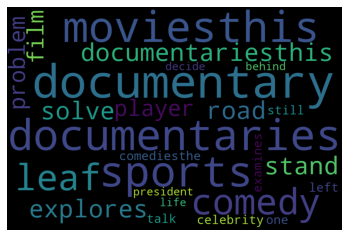

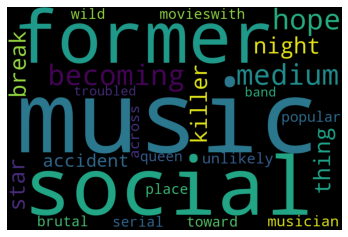

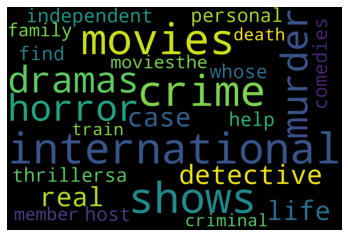

In [50]:
# topic 0
draw_word_cloud(4)
draw_word_cloud(3)
draw_word_cloud(7)

As we can see from the wordcloud that from two topics one is about documentries and other is about kids shows, therefore, topic modelling successfully classifies movies and shows into genre

### **MOVIE RECOMMENDATION**

In [51]:
tfidf = TfidfVectorizer(stop_words='english')

#Construct the required TF-IDF matrix by fitting and transforming the data
tfidf_matrix = tfidf.fit_transform(netflix_data['description'])

#Output the shape of tfidf_matrix
tfidf_matrix.shape

(7777, 17893)

In [52]:
from sklearn.metrics.pairwise import linear_kernel
from sklearn.preprocessing import StandardScaler

cosine similarity matrix:-

Cosine similarity is a metric used to determine how similar two entities are irrespective of their size. Mathematically, it measures the cosine of the angle between two vectors projected in a multi-dimensional space

In [53]:
#cosine similarity matrix
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [54]:
movie_names = pd.Series(netflix_data.index, index=netflix_data['title'])

In [55]:
def recommended_movies_and_shows(title, cosine_sim=cosine_sim):
    name = movie_names[title]
    sim_scores = list(enumerate(cosine_sim[name]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    # Get the scores of similar movies
    sim_scores = sim_scores[1:6]
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 5 most similar movies
    return netflix_data['title'].iloc[movie_indices]

RECOMMENDING YOU SOME

In [56]:
print('IF YOU WATCHED CRIMINAL MINDS,YOU WILL LIKE\n\n',recommended_movies_and_shows('Criminal Minds'))

IF YOU WATCHED CRIMINAL MINDS,YOU WILL LIKE

 4281    Mundeyan Ton Bachke Rahin
1538             Criminal: France
1540              Criminal: Spain
3868               Mahjong Heroes
1303             Chef & My Fridge
Name: title, dtype: object


In [57]:
print('IF YOU WATCHED ​​Kuch Bheege Alfaaz,YOU WILL LIKE\n\n',recommended_movies_and_shows('​​Kuch Bheege Alfaaz'))

IF YOU WATCHED ​​Kuch Bheege Alfaaz,YOU WILL LIKE

 7375                       Us and Them
1659                            Deaf U
4151             Mission: Destroy Love
6031    Terrace House: Tokyo 2019-2020
5760               Spirit: Riding Free
Name: title, dtype: object




# **K-Means Clustering**


K-means clustering is a type of unsupervised learning, which is used when you have unlabeled data (i.e., data without defined categories or groups). The goal of this algorithm is to find groups in the data, with the number of groups represented by the variable K

In [58]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
sc = scaler.fit_transform(new_netflix_data)
netflix = pd.DataFrame(sc, columns=list(new_netflix_data.columns))
X = netflix
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
score = [kmeans[i].fit(netflix).score(netflix) for i in range(len(kmeans))]

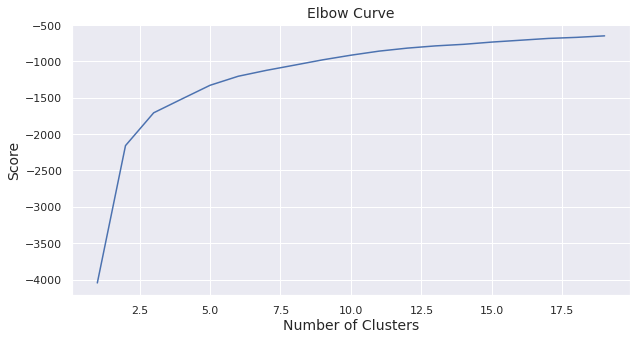

In [59]:
pl.plot(Nc,score)
pl.xlabel('Number of Clusters', fontsize = 14)
pl.ylabel('Score', fontsize = 14)
pl.title('Elbow Curve',fontsize = 14)
pl.show()

In [60]:
#fitting
kmeans = KMeans(n_clusters=5)
kmeans.fit(netflix)

KMeans(n_clusters=5)

In [61]:
len(kmeans.labels_)

netflix_data['cluster'] = kmeans.labels_
netflix_data.head()

,show_id,type,title,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,cast_name,cluster
0,s1,TV Show,3%,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,8,"[João Miguel, Bianca Comparato, Michel Gomes...",4
1,s2,Movie,7:19,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,12,"[Demián Bichir, Héctor Bonilla, Oscar Serran...",2
2,s3,Movie,23:59,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018,12,"[Tedd Chan, Stella Chung, Henley Hii, Lawre...",3
3,s4,Movie,9,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017,11,"[Elijah Wood, John C. Reilly, Jennifer Conne...",3
4,s5,Movie,21,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123,Dramas,A brilliant group of students become card-coun...,2020,1,"[Jim Sturgess, Kevin Spacey, Kate Bosworth, ...",0


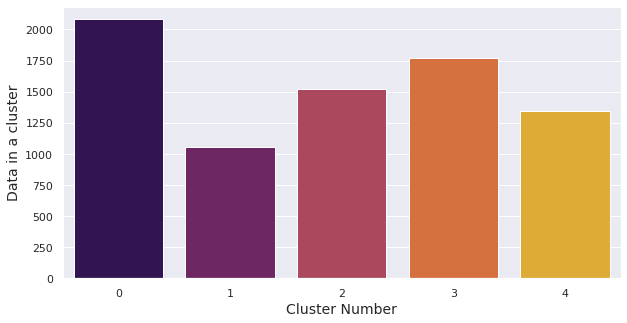

In [62]:
plt.figure(figsize=(10,5))
axis = sns.barplot(x=np.arange(0,5,1),palette="inferno",y=netflix_data.groupby(['cluster']).count()['type'].values)
x=axis.set_xlabel("Cluster Number", fontsize =14)
x=axis.set_ylabel("Data in a cluster", fontsize =14)
plt.show()

We clearly see that one cluster is the largest and one cluster has the fewest number of movies.

In [63]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(netflix)

print(len(kmeans.labels_))
netflix_data['cluster'] = kmeans.labels_
netflix_data.head()

7777


,show_id,type,title,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,cast_name,cluster
0,s1,TV Show,3%,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,8,"[João Miguel, Bianca Comparato, Michel Gomes...",4
1,s2,Movie,7:19,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,12,"[Demián Bichir, Héctor Bonilla, Oscar Serran...",3
2,s3,Movie,23:59,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018,12,"[Tedd Chan, Stella Chung, Henley Hii, Lawre...",2
3,s4,Movie,9,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017,11,"[Elijah Wood, John C. Reilly, Jennifer Conne...",2
4,s5,Movie,21,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123,Dramas,A brilliant group of students become card-coun...,2020,1,"[Jim Sturgess, Kevin Spacey, Kate Bosworth, ...",1


In [64]:
netflix_data.groupby(['cluster']).mean()

,release_year,duration,year_added,month_added
cluster,,,,
0,2016.283822,1.774834,2018.681173,3.456008
1,2013.176442,98.891420,2018.664566,2.835191
2,2013.045531,91.327712,2018.307476,9.433952
3,2012.429967,109.116612,2018.431270,8.769381
4,2016.155622,1.749814,2018.399851,9.688757


In [65]:
size_array = list(netflix_data.groupby(['cluster']).count()['duration'].values)
size_array

[1057, 2063, 1779, 1535, 1343]

**IDENTIFYING** **CLUSTERS**

In [66]:
netflix_data[netflix_data['cluster']==size_array.index(sorted(size_array)[0])].sample(5)

,show_id,type,title,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,cast_name,cluster
980,s981,TV Show,Bling Empire,missing info,United States,2021-01-15,2021,TV-MA,1,Reality TV,Follow LA's wildly wealthy Asian and Asian Ame...,2021,1,[missing info],0
3386,s3387,TV Show,Killer Inside: The Mind of Aaron Hernandez,Aaron Hernandez,United States,2020-01-15,2020,TV-MA,1,"Crime TV Shows, Docuseries","Via interviews with friends, players and insid...",2020,1,[Aaron Hernandez],0
879,s880,TV Show,Bh Se Bhade,"Deven Bhojani, Suchita Trivedi, Sarita Joshi, ...",India,2018-04-01,2013,TV-PG,1,"International TV Shows, TV Comedies",A kind-hearted insurance agent has the mysteri...,2018,4,"[Deven Bhojani, Suchita Trivedi, Sarita Josh...",0
6636,s6637,TV Show,The Making of Frozen Planet,David Attenborough,"United Kingdom, United States, Spain, Germany,...",2016-01-28,2012,TV-PG,1,"British TV Shows, Docuseries, Science & Nature TV",Documentary crew members brave Earth's most fr...,2016,1,[David Attenborough],0
672,s673,TV Show,Babylon Berlin,"Volker Bruch, Liv Lisa Fries, Peter Kurth, Leo...",Germany,2020-03-01,2020,TV-MA,3,"Crime TV Shows, International TV Shows, TV Dramas",A Soviet freight train's hijacking leads a hau...,2020,3,"[Volker Bruch, Liv Lisa Fries, Peter Kurth, ...",0


In [67]:
netflix_data[netflix_data['cluster']==size_array.index(sorted(size_array)[-1])].sample(5)

,show_id,type,title,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,cast_name,cluster
5571,s5572,Movie,Shonar Pahar,"Tanuja, Jishu Sengupta, Parambrata Chatterjee,...",India,2019-02-22,2018,TV-PG,131,"Dramas, Independent Movies, International Movies",An older woman's unique friendship with a youn...,2019,2,"[Tanuja, Jishu Sengupta, Parambrata Chatterj...",1
344,s345,Movie,Agustín Aristarán: Soy Rada,Agustín Aristarán,Argentina,2018-02-16,2018,TV-MA,60,Stand-Up Comedy,"Argentine comedian Agustín ""Radagast"" Aristará...",2018,2,[Agustín Aristarán],1
2854,s2855,Movie,Hridaynath,"Jackie Shroff, Aditya Pancholi, Swarangi Mahar...",India,2018-01-01,2012,TV-14,103,"Dramas, International Movies",A schoolteacher known for his good deeds and b...,2018,1,"[Jackie Shroff, Aditya Pancholi, Swarangi Ma...",1
438,s439,Movie,Altered Carbon: Resleeved,"Tatsuhisa Suzuki, Rina Satou, Ayaka Asai, Jouj...","Japan, United States",2020-03-19,2020,TV-MA,75,"Action & Adventure, Anime Features, Internatio...","On the planet Latimer, Takeshi Kovacs must pro...",2020,3,"[Tatsuhisa Suzuki, Rina Satou, Ayaka Asai, ...",1
4714,s4715,Movie,Oversize Cops,"Sarun Cinsuvapala, Pramote Pathan, Suphachai S...",Thailand,2019-03-23,2017,TV-MA,100,"Action & Adventure, Comedies, International Mo...","While investigating a bank robbery, a squad of...",2019,3,"[Sarun Cinsuvapala, Pramote Pathan, Suphacha...",1


We see that movies and tv-shows are grouped in different clusters

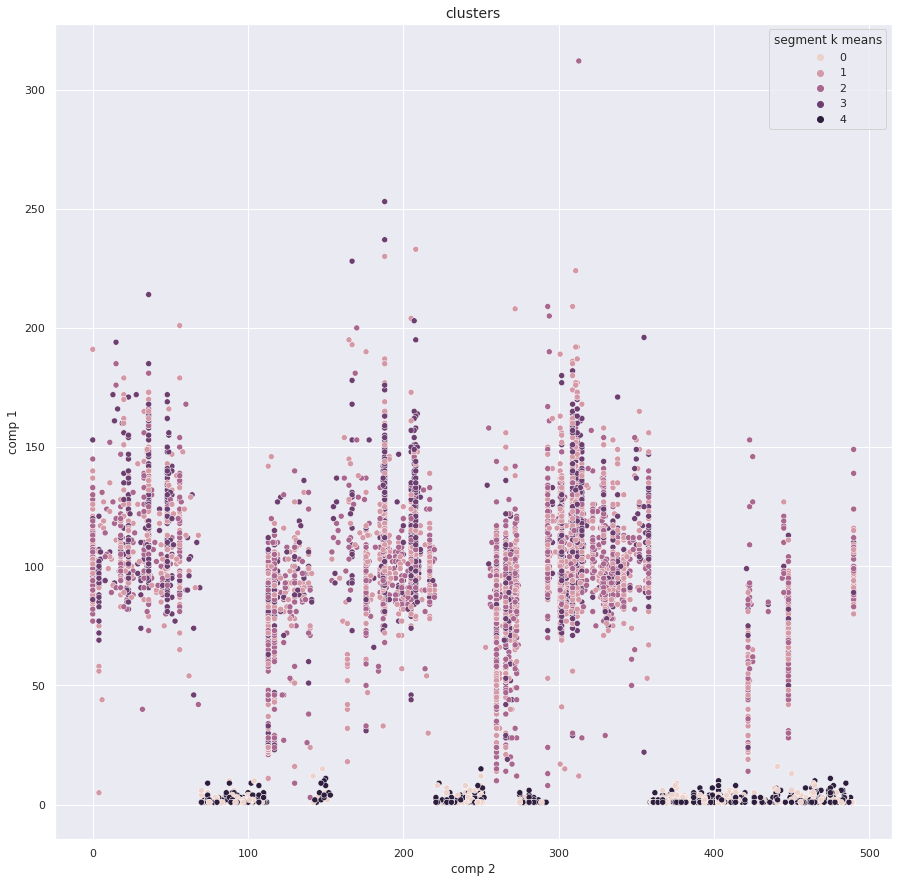

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7777 entries, 0 to 7786
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   type             7777 non-null   int64  
 1   country          7777 non-null   int64  
 2   release_year     7777 non-null   int64  
 3   rating           7777 non-null   int64  
 4   comp 1           7777 non-null   int64  
 5   comp 2           7777 non-null   int64  
 6   comp 3           7777 non-null   int64  
 7   comp 4           7777 non-null   int64  
 8   comp 5           19 non-null     float64
 9   segment k means  7777 non-null   int32  
dtypes: float64(1), int32(1), int64(8)
memory usage: 638.0 KB


In [69]:
netflix_data = pd.concat([new_netflix_data,pd.DataFrame(score)],axis=1)
netflix_data.columns.values[-5:]=['comp 1','comp 2','comp 3','comp 4','comp 5']
netflix_data['segment k means'] = kmeans.labels_

#data = data.set_index(data['show_id'])
#f_mm.head()

x_axis = netflix_data['comp 2']
y_axis = netflix_data['comp 1']
plt.figure(figsize=(15,15))
sns.scatterplot(x_axis,y_axis,hue=netflix_data['segment k means'])
plt.title('clusters', fontsize = 14)
plt.show()


netflix_data.info()

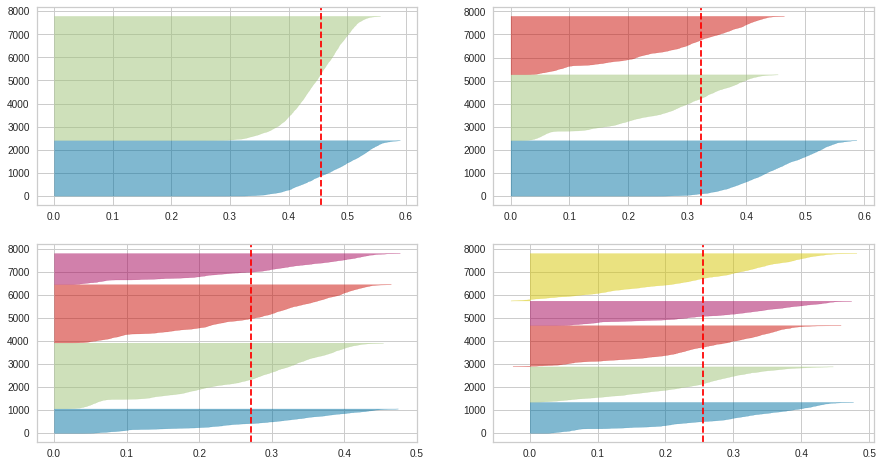

In [70]:
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(2, 2, figsize=(15,8))
for i in [2, 3, 4, 5]:
    '''
    Create KMeans instance for different number of clusters
    '''
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(X)

Here is the Silhouette analysis done on the above plots to select an optimal value for n_clusters.

The value of 4 and 5 for n_clusters looks to be the optimal one. The silhouette score for each cluster is above average silhouette scores.

# **Conclusion**

There are about 70% movies and 30% TV shows on Netflix.

The United States has the highest number of content on Netflix by a huge margin followed by India.

LDA and LSA has sorted much more similar titles in a group of genre.

Recommendation system works perfectly well with description column.

After applying K - means optimal value of number of clusters is 5.

Silhouette score for a set of sample data points is used to measure how dense and well-separated the clusters are.